# Analysis of experiments

The goal of this notebook is to analyse the results from FL experiments, more especially the energy consumption of the experiments and the training rounds.
The preprocessing functions can be found in process_energy.py. They compute statistics (total energy and round energy) for every experiments in the given folders. 
This notebook first shows experiment statistics before studying the round energy consumption.

Tasks:
- [DONE] visualize the evolution of the energy consumption of the server and the clients during the training
- [DONE] visualize the evolution of the local and global loss/accuracy
- [DONE] Compute the local/total energy consumption of each experiments
- Compare experiments
    - complete experiment_summary with 
        - [DONE] final accuacry (centralized, distributed max, dist avg)
        - [DONE] total energy
        - energy per client
        - [DONE] number of rounds to reach accuracy
        - training time
- [DONE] Compute the energy consumption of each round for each hosts/clients
    - [DONE] study the impact of training several clients on one host
- [DONE] Is the energy consumed by each round stable? 
- [DONE] How does the number of epoch impacts it?

Remarks:
- Power is in milliwatts

This notebook requires running preprocess() and aggregate_round_stats() once.

## Imports and paths

In [2]:
import matplotlib.pyplot as plt
import seaborn.objects as so
import json
from seaborn import axes_style
theme_dict = {**axes_style("whitegrid"), "grid.linestyle": ":"}
so.Plot.config.theme.update(theme_dict)
import sys

fl_repo = '/Users/mathildepro/Documents/code_projects/FL-G5K-EnergyConsumption'
# fl_repo = '/home/mjay/FL-G5K-Test'
logs = '/Users/mathildepro/Documents/code_projects/fl_logs/mars24'
# logs = '/home/mjay/energyfl/outputcifar10'

sys.path.append(f'{fl_repo}/src/utils')

from process_energy import preprocess, aggregate_round_stats


In [3]:
outputs_path = [
    f"{logs}/fedyogi/labelskew",
    f"{logs}/fedavg/labelskew",
    f"{logs}/fedadam/labelskew",
    f"{logs}/fedadagrad/labelskew"
]
preprocess(outputs_path)
results, round_results = aggregate_round_stats(
    logs,
    outputs_path,    
    )


Processing experiment /Users/mathildepro/Documents/code_projects/fl_logs/mars24/fedyogi/labelskew/2024-02-29_17-52-05
Processing experiment /Users/mathildepro/Documents/code_projects/fl_logs/mars24/fedyogi/labelskew/2024-02-29_19-03-38
Processing experiment /Users/mathildepro/Documents/code_projects/fl_logs/mars24/fedyogi/labelskew/2024-03-01_03-11-35
Folder /Users/mathildepro/Documents/code_projects/fl_logs/mars24/fedyogi/labelskew/2024-03-01_03-11-35 does not exist
Processing experiment /Users/mathildepro/Documents/code_projects/fl_logs/mars24/fedyogi/labelskew/2024-03-01_11-08-10
Folder /Users/mathildepro/Documents/code_projects/fl_logs/mars24/fedyogi/labelskew/2024-03-01_11-08-10 does not exist
Processing experiment /Users/mathildepro/Documents/code_projects/fl_logs/mars24/fedyogi/labelskew/2024-03-01_11-33-51
Processing experiment /Users/mathildepro/Documents/code_projects/fl_logs/mars24/fedyogi/labelskew/2024-03-01_14-22-02
Processing experiment /Users/mathildepro/Documents/code_

The concatenation of march (10 clients per host) and april (1 client per host) logs doesn't work so each need to be analysed separately.

In [5]:
import dask.dataframe as dd

# Read large datasets in parallel
logs = '/Users/mathildepro/Documents/code_projects/fl_logs/mars24'
results_pq = dd.read_parquet(f"{logs}/global_summary.parquet")
round_pq = dd.read_parquet(f"{logs}/round_summary.parquet")

# logs = '/Users/mathildepro/Documents/code_projects/fl_logs/avril24'
# results_pq = dd.read_parquet(f"{logs}/global_summary.parquet")
# round_pq = dd.read_parquet(f"{logs}/round_summary.parquet")

In [6]:
with open('experiments.json','r') as f:
    strategies_dict = json.load(f)

In [7]:
dateexp_to_keep = []
for key_1 in strategies_dict.keys():
    for key_2 in strategies_dict[key_1].keys():
        for key_3 in strategies_dict[key_1][key_2].keys():
            dateexp_to_keep.append(strategies_dict[key_1][key_2][key_3]["summary"]['result_folder'].split("/")[-1])

In [8]:
dateexp_to_keep[0]

'2024-04-22_20-33-15'

In [27]:
results_pq = results_pq[results_pq.exp_id.isin(dateexp_to_keep)].drop_duplicates()

# Experiment energy

In [9]:
results_pq.describe().compute()

sleep_duration  params.num_rounds  params.num_clients_per_round_fit  \
count            26.0               26.0                              26.0   
mean             30.0             2000.0                              10.0   
std               0.0                0.0                               0.0   
min              30.0             2000.0                              10.0   
25%              30.0             2000.0                              10.0   
50%              30.0             2000.0                              10.0   
75%              30.0             2000.0                              10.0   
max              30.0             2000.0                              10.0   

       params.num_clients_per_round_eval  params.min_available_clients  \
count                               26.0                          23.0   
mean                                10.0                          60.0   
std                                  0.0                           0.0   
min                                 10.0                          60.0   
25%                                 10.0                          60.0   
50%                                 10.0                          60.0   
75%                                 10.0                          60.0   
max                                 10.0                          60.0   

       params.fraction_fit  params.fraction_evaluate  params.wait_round  \
count         2.600000e+01              2.600000e+01          26.000000   
mean          1.000000e-01              3.000000e-01         192.307692   
std           1.415262e-17              5.661049e-17         532.783691   
min           1.000000e-01              3.000000e-01          30.000000   
25%           1.000000e-01              3.000000e-01          30.000000   
50%           1.000000e-01              3.000000e-01          30.000000   
75%           1.000000e-01              3.000000e-01          30.000000   
max           1.000000e-01              3.000000e-01        2000.000000   

       params.lr  params.num_groups  ...  clients_kWh       server_J  \
count      26.00               26.0  ...    26.000000      26.000000   
mean        0.01               32.0  ...     0.285258  111424.347268   
std         0.00                0.0  ...     0.242033  102018.252700   
min         0.01               32.0  ...     0.000222     131.146359   
25%         0.01               32.0  ...     0.123901   59378.069509   
50%         0.01               32.0  ...     0.234375   89090.081119   
75%         0.01               32.0  ...     0.342160  120971.305736   
max         0.01               32.0  ...     1.020193  523168.140310   

       server_kWh       total_J  total_kWh  max_centralized_accuracy  \
count   26.000000  2.600000e+01  26.000000                 25.000000   
mean     0.030951  1.138352e+06   0.316209                  0.449288   
std      0.028338  9.676556e+05   0.268793                  0.320476   
min      0.000036  9.310366e+02   0.000259                  0.100000   
25%      0.016494  5.075195e+05   0.140978                  0.100000   
50%      0.024747  9.279249e+05   0.257757                  0.708200   
75%      0.033603  1.330431e+06   0.369564                  0.743200   
max      0.145324  4.195864e+06   1.165518                  0.777700   

       max_distributed_accuracy  round_number  nb_hosts  nb_energy_hosts  
count                 25.000000     25.000000      25.0         25.00000  
mean                   0.483063    255.760000      10.0          9.36000  
std                    0.290766    377.090316       0.0          0.81035  
min                    0.147340     53.000000      10.0          7.00000  
25%                    0.169444    118.000000      10.0          9.00000  
50%                    0.714489    173.000000      10.0         10.00000  
75%                    0.750341    215.000000      10.0         10.00000  
max                    0.787966   2000.000000      10.0        

In [29]:
# results_pq[[x for x in results_pq if "estats" in x]] = results_pq[[x for x in results_pq if "estats" in x]].fillna("")
# results_pq["total_kWh"] = results_pq["total_kWh"].fillna(0)
# results_pq = results_pq.dropna()

In [10]:
parameters = [
    # 'server', 
    # 'params.num_clients_per_round_fit',
    # 'params.num_clients_per_round_eval',
    "strategy", 
    'data.num_clients',
    # 'params.min_available_clients', 
    # 'neuralnet',
    # 'optimizer',
    'data.batch_size', 
    'client.lr',
    "params.fraction_fit",	
    'client.local_epochs', 
    'params.wait_round', #'params.num_rounds',
    ]
# results.groupby(parameters)[["total_kWh"]].count().style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)
agg = results_pq.groupby(parameters)[["total_kWh"]].count().rename(columns={"total_kWh":"count"})
agg.compute().style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

In [11]:

perf_metrics = [
    "total_kWh",
    "max_centralized_accuracy", 
    "max_distributed_accuracy", 
    "round_number"
    ]
# results.groupby(parameters)[perf_metrics].mean().style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)
results_pq.groupby(parameters)[perf_metrics].mean().compute().style.background_gradient(cmap='viridis', low=0.2, high=0.2, axis=0)

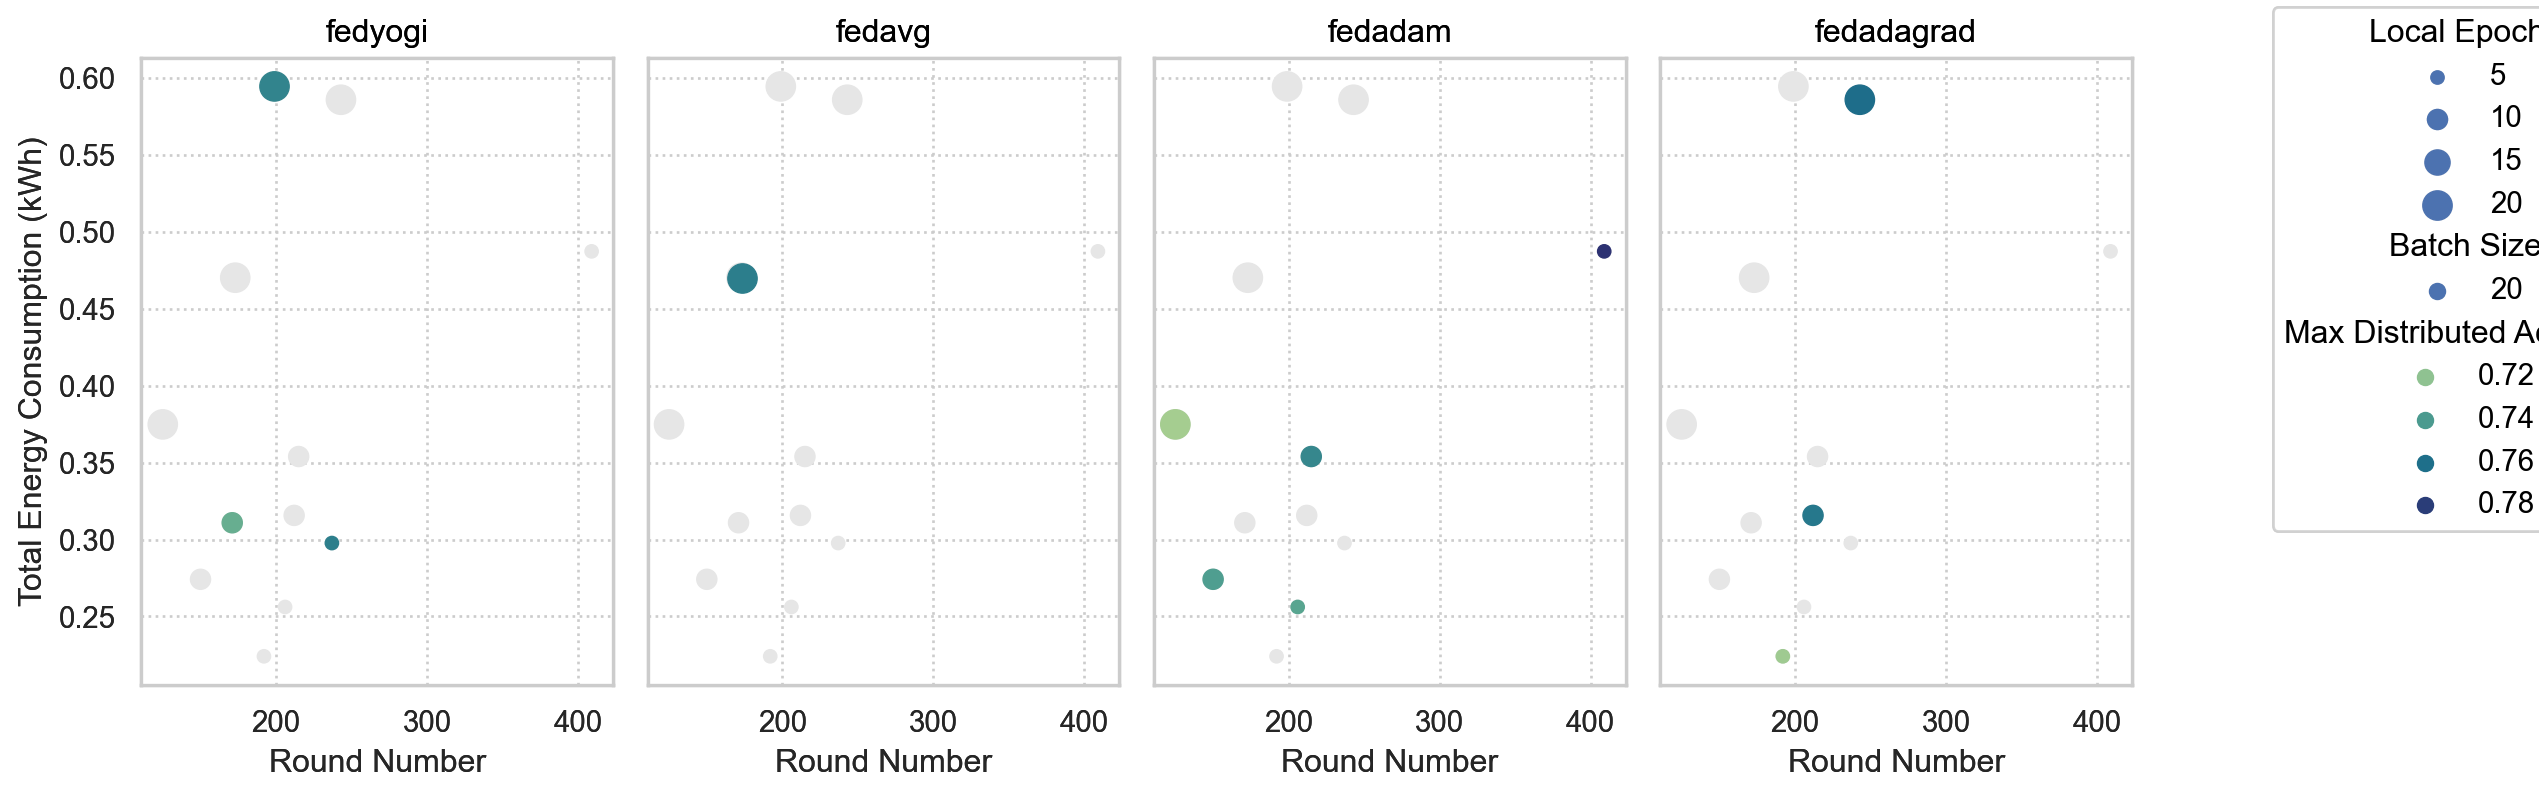

In [16]:
# plot_data = results_pq[(results_pq["round_number"].isin([30,100]))&(results_pq["max_distributed_accuracy"]>0.2)].compute() #[results["max_centralized_accuracy"]>0.1]
plot_data = results_pq[(results_pq["round_number"]<500)&(results_pq["max_distributed_accuracy"]>0.2)].compute() #[results["max_centralized_accuracy"]>0.1]
# plot_data = results_pq.compute()
f = plt.Figure(figsize=(12, 5))
(
    so.Plot(
        plot_data, x="round_number", y="total_kWh",
        pointsize="client.local_epochs", color="max_distributed_accuracy",
        marker="data.batch_size",
    )
    .facet(
        col="strategy",
        # row="params.wait_round"
        )
    .add(so.Dot(color=".9"), col=None, color=None, row=None)
    .add(so.Dot())
    .scale(
        pointsize=(5, 11), 
        color="crest")
    .label(
        x="Round Number", 
        y="Total Energy Consumption (kWh)", 
        pointsize="Local Epochs", 
        color="Max Distributed Accuracy", 
        row="Wait Round: ", 
        marker="Batch Size",
        bbox_to_anchor=(1.05, 1),
        #col="Strategy:"
    )
    # .limit(y=(0, 0.3))
    .layout(engine="tight")
    .on(f)
    # .save("/Users/mathildepro/Documents/code_projects/FL-G5K-EnergyConsumption/graphs/experiment_perf_summaries_100clients.pdf", bbox_inches="tight")
)

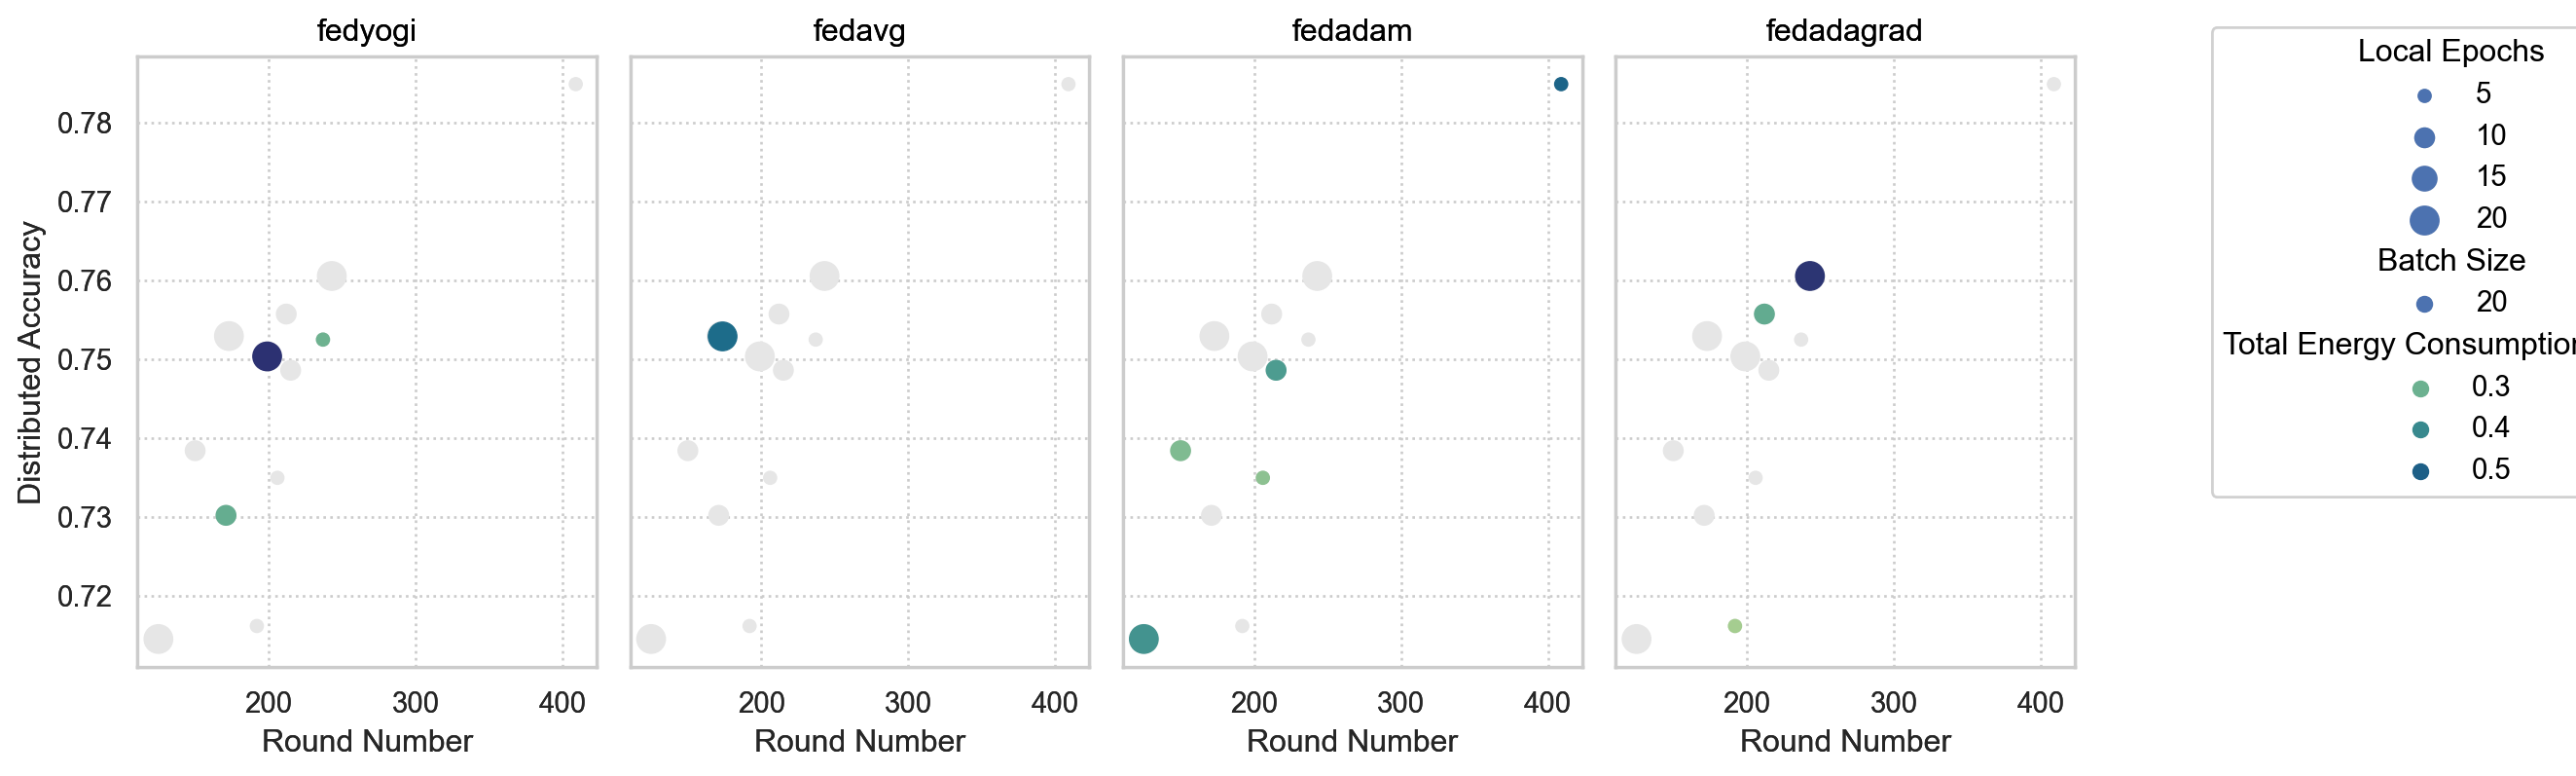

In [18]:
# plot_data = results_pq[(results_pq["round_number"].isin([100,300]))&(results_pq["max_distributed_accuracy"]>0.2)].compute() #[results["max_centralized_accuracy"]>0.1]
plot_data = results_pq[(results_pq["round_number"]<500)&(results_pq["max_distributed_accuracy"]>0.2)].compute() #[results["max_centralized_accuracy"]>0.1]
# plot_data = results_pq.compute()
f = plt.Figure(figsize=(12, 5))
(
    so.Plot(
        plot_data, x="round_number", y="max_distributed_accuracy",
        pointsize="client.local_epochs", color="total_kWh",
        marker="data.batch_size",
    )
    .facet(
        col="strategy",
        # row="params.wait_round"
        )
    .add(so.Dot(color=".9"), col=None, color=None, row=None)
    .add(so.Dot())
    .scale(
        pointsize=(5, 11), 
        color="crest")
    .label(
        x="Round Number", 
        y="Distributed Accuracy", 
        pointsize="Local Epochs", 
        color="Total Energy Consumption (kWh)", 
        row="Wait Round: ", 
        marker="Batch Size",
        bbox_to_anchor=(1.05, 1),
        #col="Strategy:"
    )
    .layout(engine="tight")
    .on(f)
    # .save("/Users/mathildepro/Documents/code_projects/FL-G5K-EnergyConsumption/graphs/experiment_acc_summaries_100clients.pdf", bbox_inches="tight")
)

[Comments for march results]

Those last graphs show the relationship between the number of local epochs, the strategy, the number of rounds and the energy consumption. The main observation is that the algorithm needs a minimum number of local epochs to learn. For most strategy, 5 local epochs leads to no learning, and a max accuracy below 0.2. And for fedavg, the algorithm requires at least 20 local epochs to reach an accuracy higher than 0.6. 
Other observations:
- reaching an accuracy higher than 0.6 requires in average more energy and more rounds, which can be expected. It seems that there are only two scenarios: it doesn't learn at all and is stoped very early by wait_round, or it reaches the target accuracy 0.7. The second option systematically consumes more energy, but not significantly more. 
- The higher the number of local epochs, the higher the energy consumption. Even accross stragetes, the number of local epochs seems to be the most impactfull parameters regarding the total energy consumption. One exception is for fedavg and a lr of 0.05. 
- The number of rounds is not proportional to the energy consumption. Maybe we could have a look at the total number of local epochs (local epochs times the number of rounds)?

Il n'y a pas deux expériences avec les mêmes paramètres donc on ne peux pas savoir l'impact de la variabilité de l'entraînement : est ce que les différences entre les résultats sont dus aux paramètres ou aux aléa de l'entraînement ? Il faudrait faire tourner les experiences au moins 5 fois, quitte à mettre un early stopping sur le nombre de rounds et pas seulement avec le wait round. 

[Comments for april results]

For a given number of rounds, the total energy increases with the number of local numbers. However, a lower number of epochs require more round number and by consequences more energy in the end.
For the same amount of energy, fedadam and fedacg reach a higher accuracy.

## Studying energy per rounds

In [19]:
def style_round_role(role):
    return 'background-color:lightgreen;' if role == "train" else 'background-color:red;'

In [20]:
round_pq["strategy"].unique().compute()

0    fedyogi
1     fedavg
2    fedadam
Name: strategy, dtype: string

Sur une expérience de mars, en moyenne il y a 1.5 clients par hosts (si il y a un client actif sur le host) avec au maximum 5 clients actifs sur un host. 

En moyenne, les hosts sont actifs sur 35 rounds, sachant qu'il y en a 53. Donc ils sont actifs 66% du temps.

In [21]:
params = ["hostname", "server_round", "Client ID", "strategy", "params.wait_round", "params.num_rounds", "client.local_epochs"]
# fraction fit = 1 pour 10 clients, 0.1 pour 100 clients
ffit = 0.1
plot_df = round_pq[round_pq["params.fraction_fit"]==ffit].groupby(params)[["fittime"]].mean().reset_index().compute()
plot_df

hostname  server_round  Client ID strategy  params.wait_round  \
0      client_host_0             1          0  fedadam                 30   
1      client_host_0             1          0  fedadam                 30   
2      client_host_0             1          1  fedadam                 30   
3      client_host_0             1          2  fedadam                 30   
4      client_host_0             1          2  fedadam                 30   
...              ...           ...        ...      ...                ...   
26436  client_host_9           519         94  fedyogi                100   
26437  client_host_9           520         90  fedyogi                100   
26438  client_host_9           522         92  fedyogi                100   
26439  client_host_9           522         95  fedyogi                100   
26440  client_host_9           523         95  fedyogi                100   

       params.num_rounds  client.local_epochs  fittime  
0                   2000                    3     13.0  
1                   2000                    5     22.0  
2                   2000                   20     25.0  
3                   2000                   10     43.0  
4                   2000                   20     43.0  
...                  ...                  ...      ...  
26436               2000                   10     13.0  
26437               2000                   10     11.0  
26438               2000                   10     15.0  
26439               2000                   10     22.0  
26440               2000                   10     15.0  

[26441 rows x 8 columns]

In [22]:
round_pq[round_pq["strategy"]=="fedadagrad"].compute()

Empty DataFrame
Columns: [Client ID, Start Time, End Time, fittime, server_round, train_loss, train_acc, val_loss, val_acc, lr, local_epochs, round_role, eval_time, eval_loss, eval_accuracy, hostname, ('fittime', 'mean'), ('fittime', 'var'), ('fittime', 'count'), avg_client_per_host_per_round, ClientID_host, exp_id, energy_file, server, sleep_duration, neuralnet, strategy, optimizer, estats-11, estats-12, estats-2, estats-3, estats-4, estats-5, estats-6, estats-7, estats-8, estats-9, timestamps.start_experiment_before_sleep, timestamps.start_experiment, timestamps.end_experiment, timestamps.end_experiment_after_sleep, params.num_rounds, params.num_clients_per_round_fit, params.num_clients_per_round_eval, params.min_available_clients, params.fraction_fit, params.fraction_evaluate, params.wait_round, params.lr, params.num_groups, data.data_name, data.batch_size, data.validation_split, data.num_clients, data.alpha, data.partition, client.lr, client.local_epochs, client.decay_rate, client.decay_steps, comm.host, comm.port, clients_J, clients_kWh, server_J, server_kWh, total_J, total_kWh, max_centralized_accuracy, max_distributed_accuracy, round_number, nb_hosts, nb_energy_hosts, result_folder, round_energy_kWh, round_energy_J, round_energy_kWh_per_client]
Index: []

[0 rows x 78 columns]

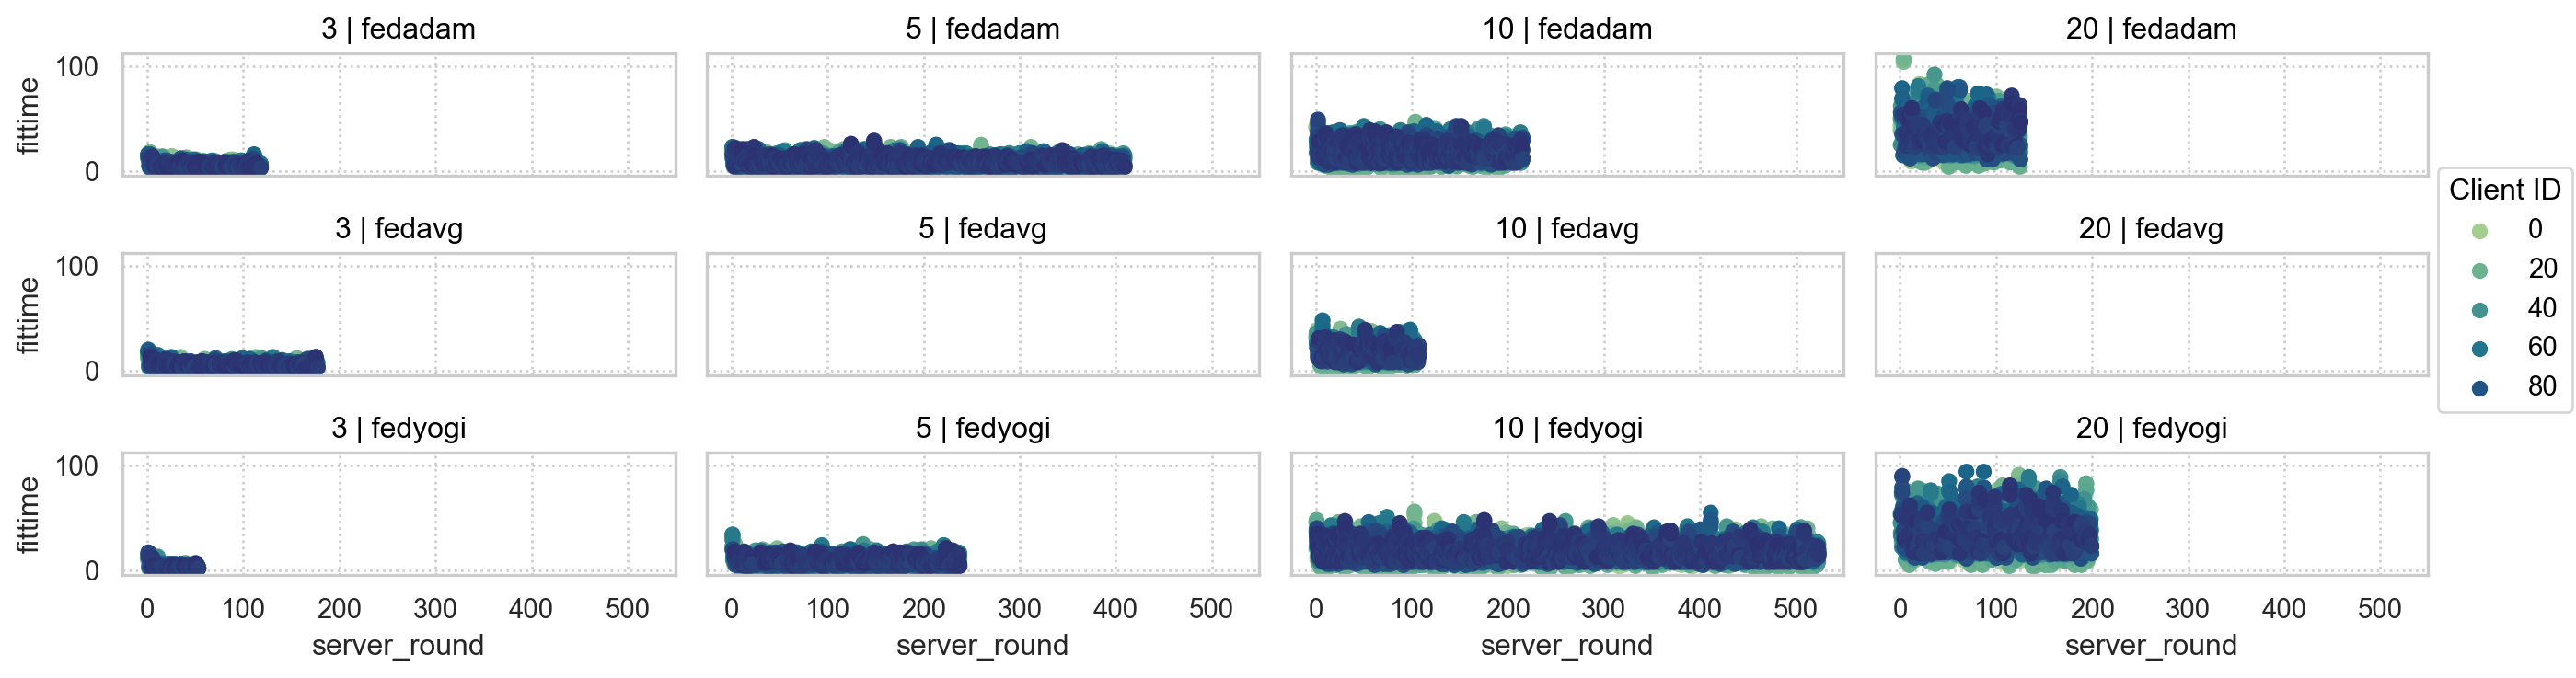

In [23]:
sf1 = plt.Figure(figsize=(14, 4))
(
    so.Plot(
        plot_df, x="server_round", y="fittime",
        #  pointsize="Client ID", 
         color="Client ID",
    )
    .facet(row="strategy", col="client.local_epochs")
    .add(so.Dot(), so.Dodge())
    .layout(engine="tight")
    .scale(color="crest", pointsize=(5, 11))
    # .label(x="Number of Clients per host", y="Training Time (s)", color="Host")
    .on(sf1)
)

The round time is higher when the number of local epochs increases.

In [24]:
params = ["hostname", "server_round", "Client ID", "strategy", "params.wait_round", "params.num_rounds","exp_id"]
plot_df = round_pq[(round_pq["params.fraction_fit"]==ffit)&(round_pq["client.local_epochs"]==3)].groupby(params)[["fittime"]].mean().reset_index().compute()
plot_df

hostname  server_round  Client ID strategy  params.wait_round  \
0     client_host_0             1          0  fedadam                 30   
1     client_host_0             2          3  fedyogi                 30   
2     client_host_0             2          5  fedyogi                 30   
3     client_host_0             3          5   fedavg                 30   
4     client_host_0             4          3  fedyogi                 30   
...             ...           ...        ...      ...                ...   
3472  client_host_9           175         93   fedavg                 30   
3473  client_host_9           175         95   fedavg                 30   
3474  client_host_9           175         98   fedavg                 30   
3475  client_host_9           176         99   fedavg                 30   
3476  client_host_9           177         93   fedavg                 30   

      params.num_rounds               exp_id  fittime  
0                  2000  2024-03-02_06-43-14     13.0  
1                  2000  2024-02-29_17-52-05     11.0  
2                  2000  2024-02-29_17-52-05      2.0  
3                  2000  2024-03-02_12-02-33     12.0  
4                  2000  2024-02-29_17-52-05      2.0  
...                 ...                  ...      ...  
3472               2000  2024-03-02_12-02-33     12.0  
3473               2000  2024-03-02_12-02-33     13.0  
3474               2000  2024-03-02_12-02-33     13.0  
3475               2000  2024-03-02_12-02-33      4.0  
3476               2000  2024-03-02_12-02-33      3.0  

[3477 rows x 8 columns]

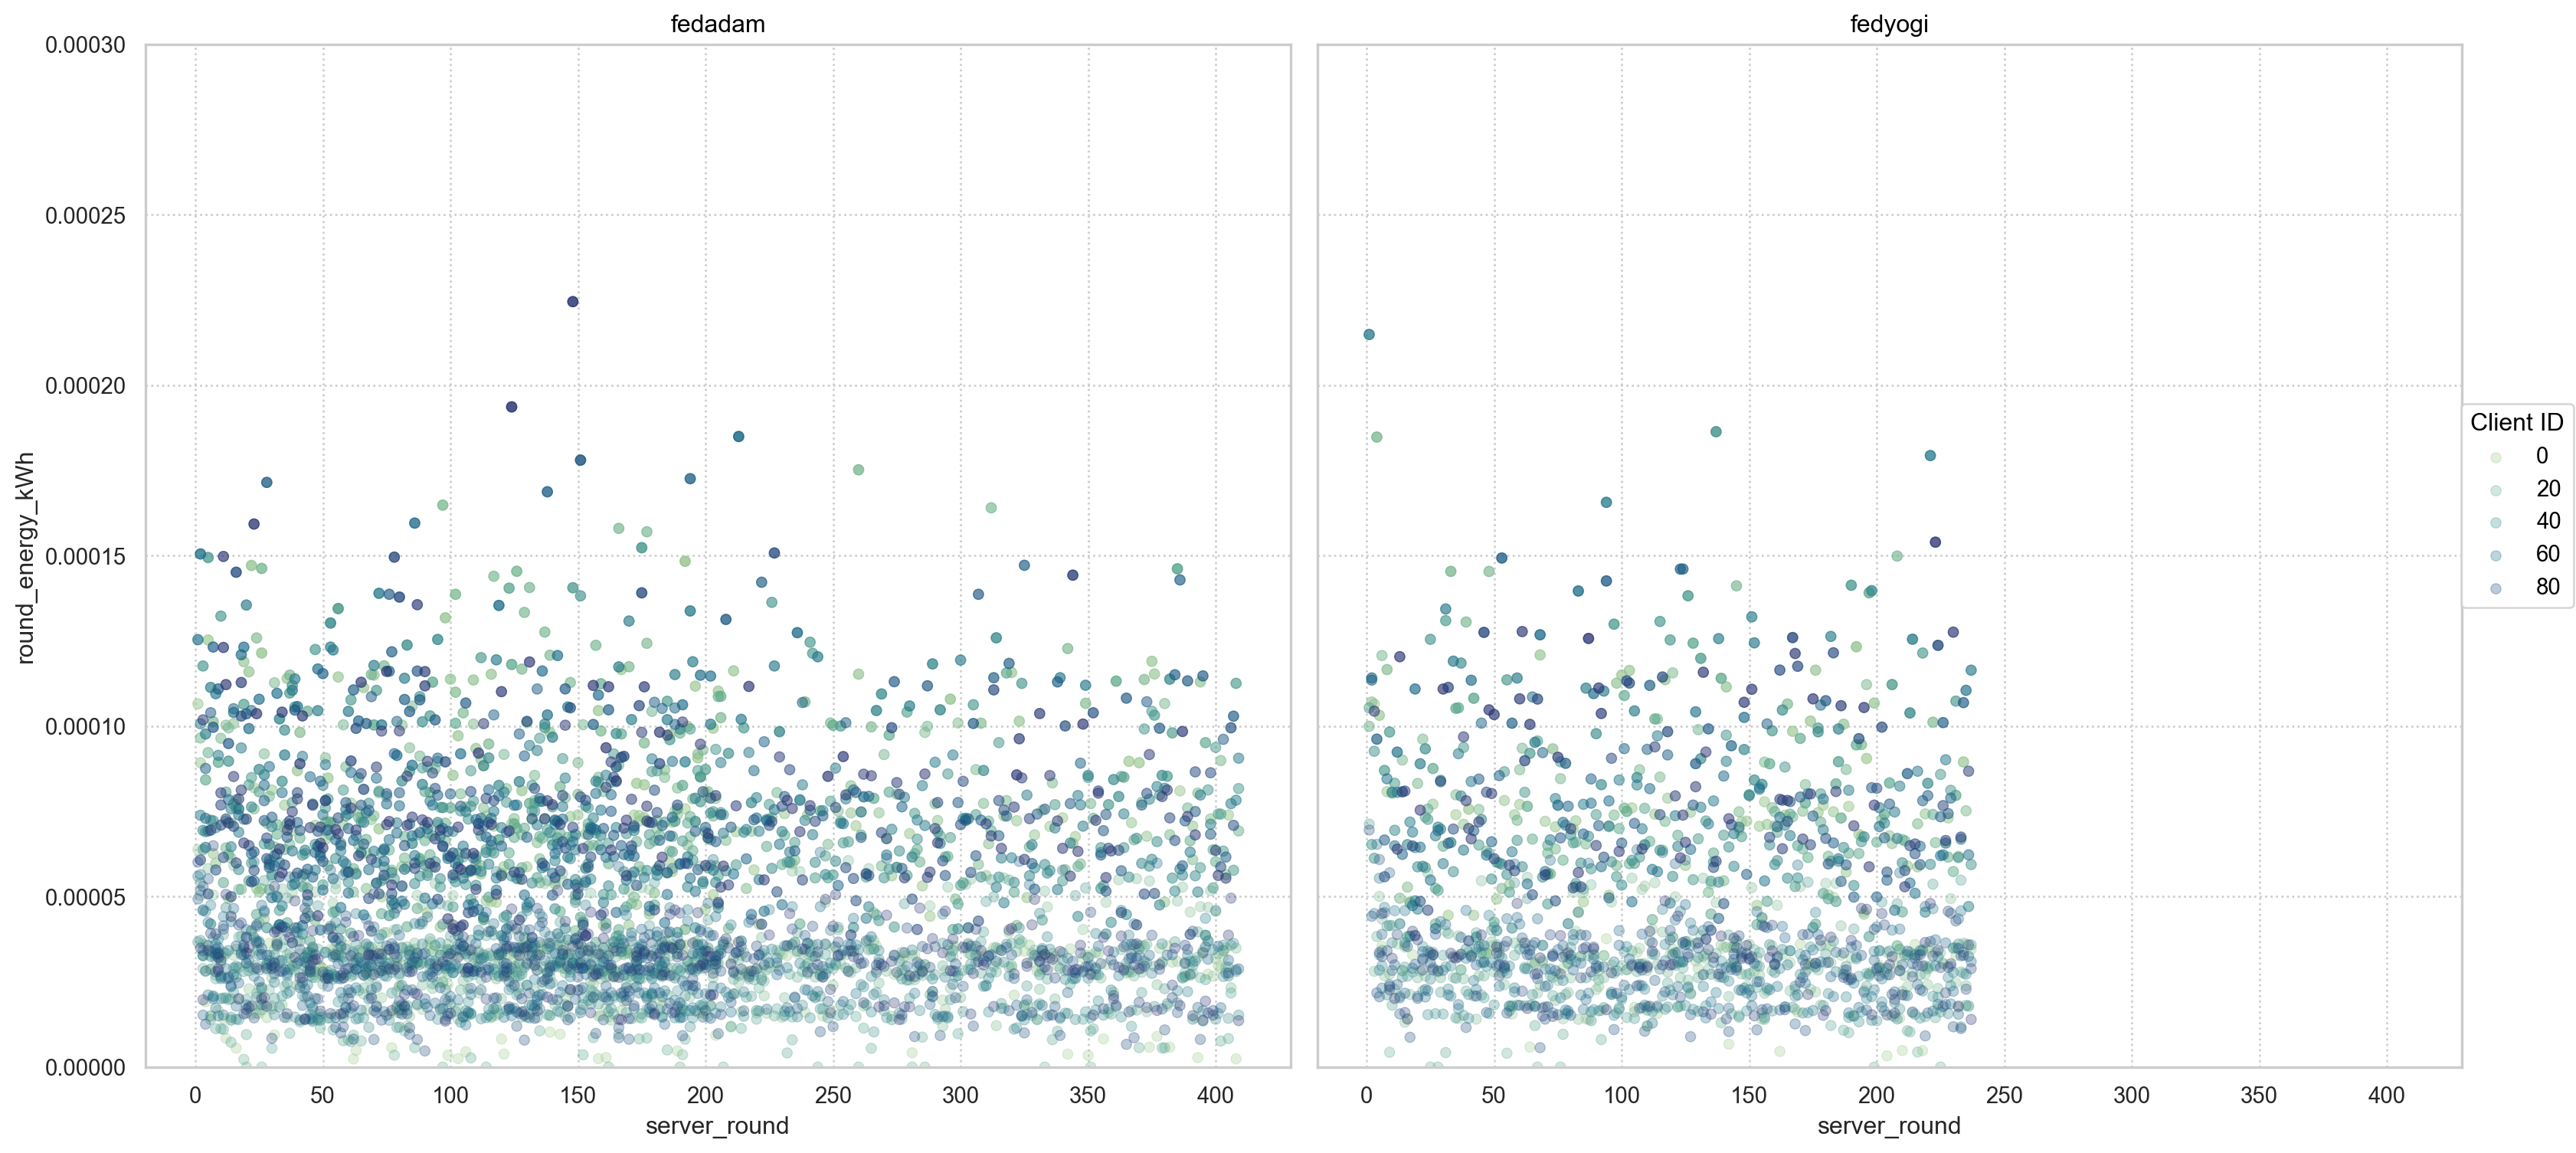

In [25]:
params = ["hostname", "server_round", "Client ID", "strategy", "params.wait_round", "params.num_rounds","exp_id"]
plot_df = round_pq[(round_pq["params.fraction_fit"]==ffit)&(round_pq["client.local_epochs"]==5)].groupby(params)[["round_energy_kWh"]].mean().reset_index().compute()

sf1 = plt.Figure(figsize=(17, 8))
(
    so.Plot(
        plot_df, x="server_round", y="round_energy_kWh",
        #  pointsize="Client ID", 
         color="Client ID",
    )
    .facet(col="strategy") #, row="Client ID")
    # .add(so.Line(linewidth=3), so.Agg()) #, so.Dodge())
    .add(so.Dot(alpha=0.3, pointsize=5))
    .limit(y=(0, 0.0003))
    .layout(engine="tight")
    .scale(color="crest", pointsize=(1, 2), edgecolor=None)
    # .label(x="Number of Clients per host", y="Training Time (s)", color="Host")
    .on(sf1)
)

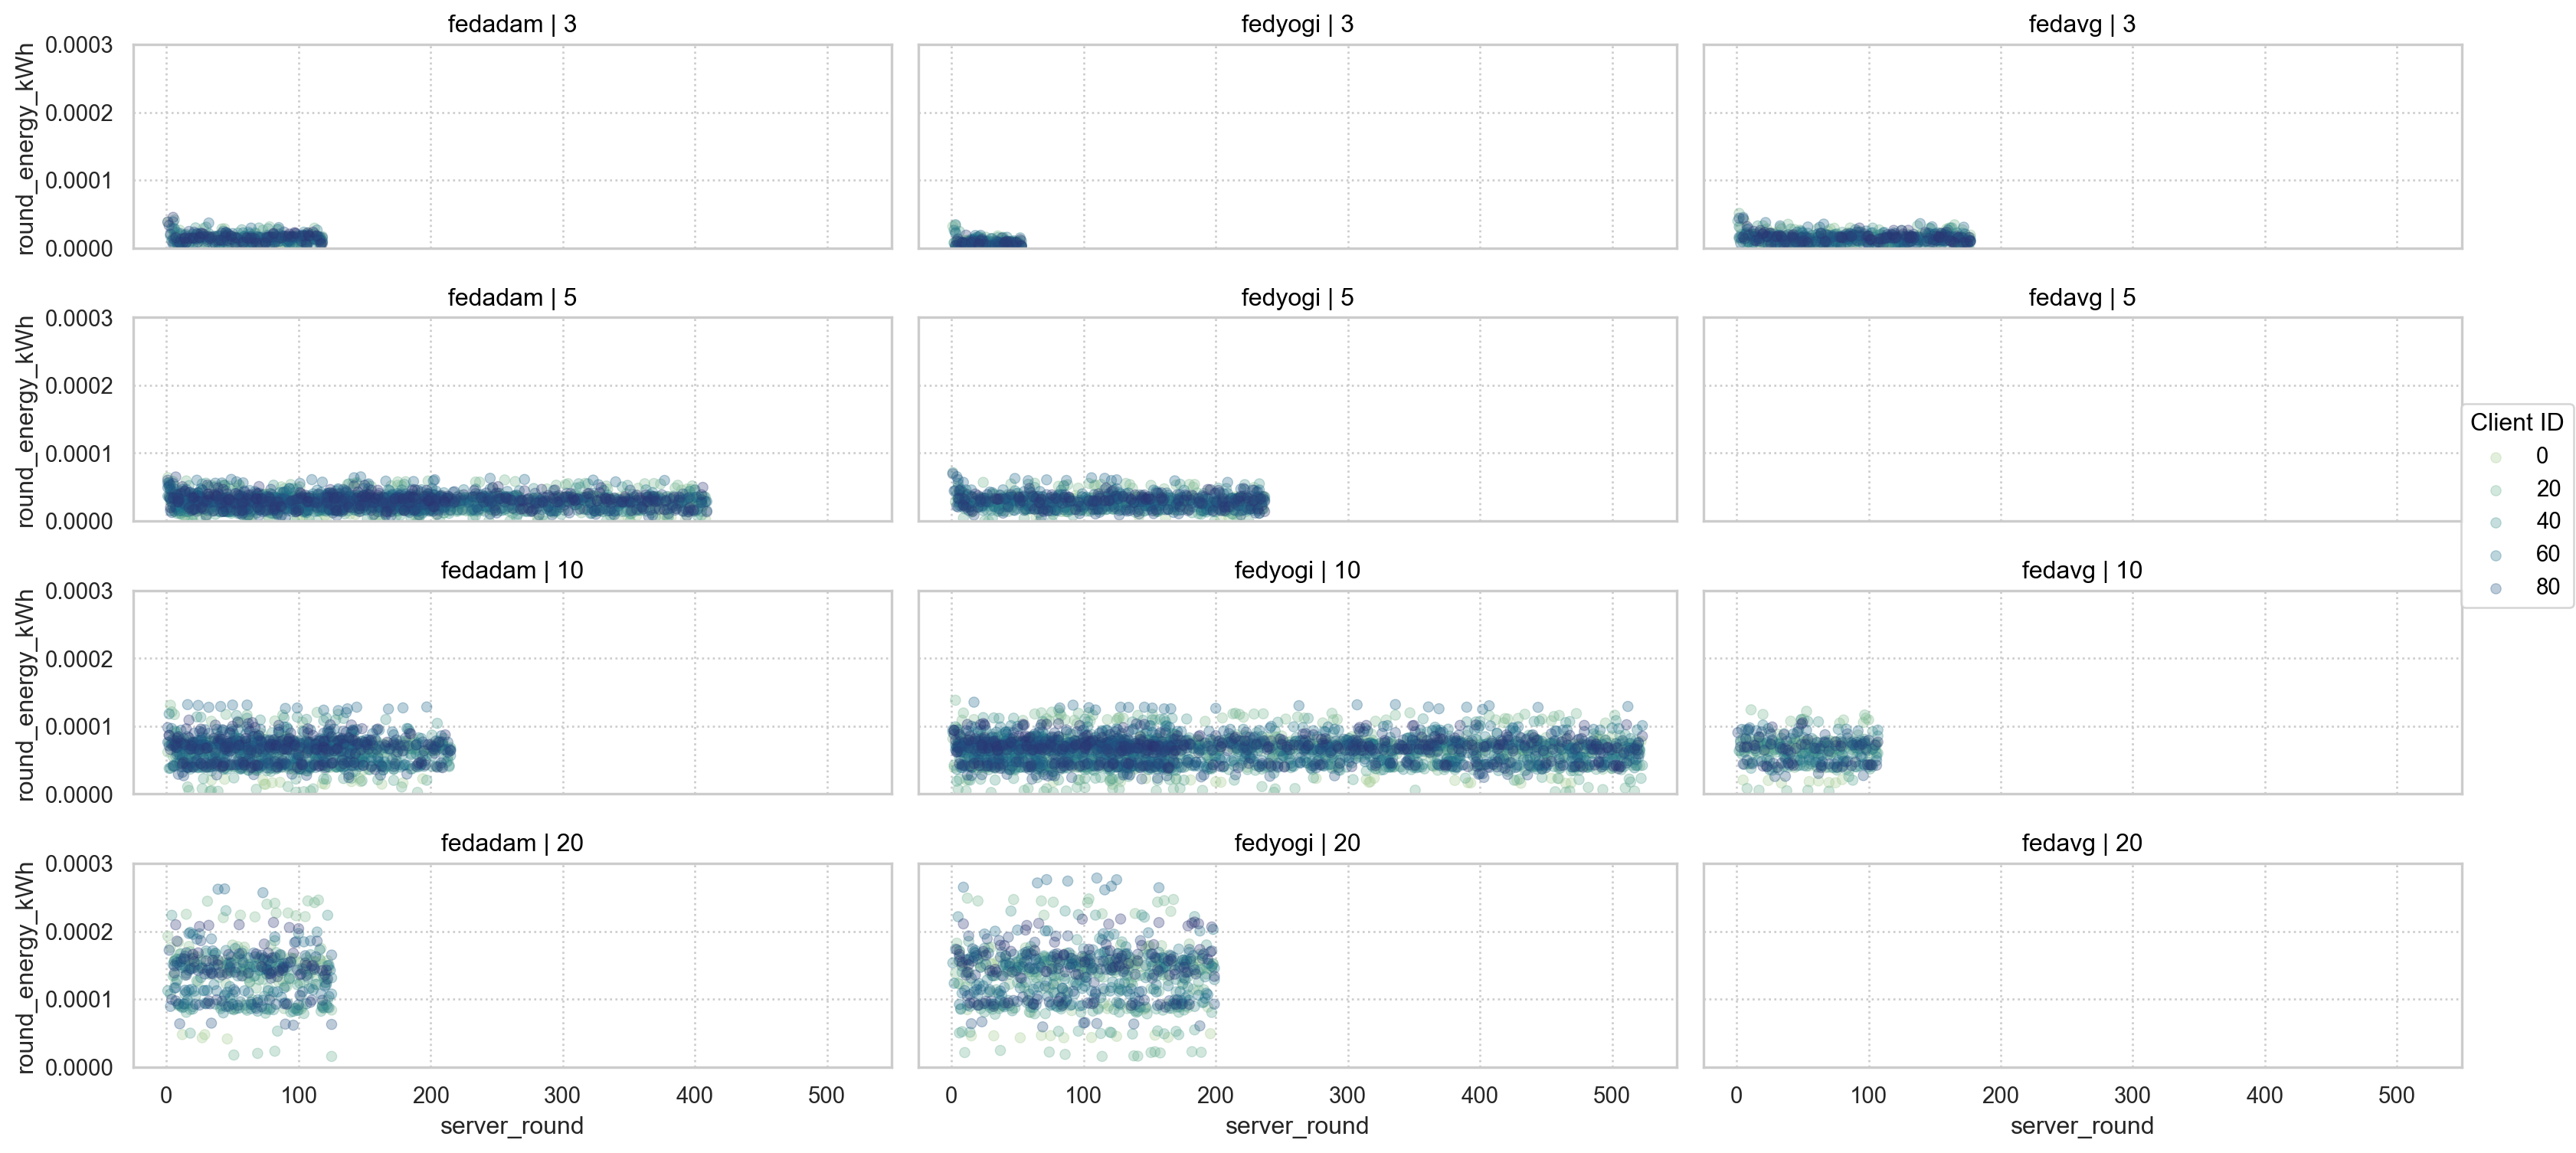

In [26]:
params = ["hostname", "server_round", "Client ID", "strategy", "params.wait_round", "params.num_rounds","exp_id","client.local_epochs"]
plot_df = round_pq[(round_pq["params.fraction_fit"]==ffit)&(round_pq["('fittime', 'count')"]==1)].groupby(params)[["round_energy_kWh"]].mean().reset_index().compute()

sf1 = plt.Figure(figsize=(17, 8))
(
    so.Plot(
        plot_df, x="server_round", y="round_energy_kWh",
        #  pointsize="Client ID", 
         color="Client ID",
    )
    .facet(col="strategy", row="client.local_epochs")
    # .add(so.Line(), so.Agg()) #, so.Dodge())
    .add(so.Dot(alpha=0.3, pointsize=5))
    
    .limit(y=(0, 0.0003))
    .layout(engine="tight")
    .scale(color="crest", pointsize=(1, 2), edgecolor=None)
    # .label(x="Number of Clients per host", y="Training Time (s)", color="Host")
    .on(sf1)
)

The training round energy consumption is highly impacted by the client ID. 
If you were able to correlate this with the size of the client database that would be amazing.

/Users/mathildepro/miniforge3/envs/energy_analysis/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


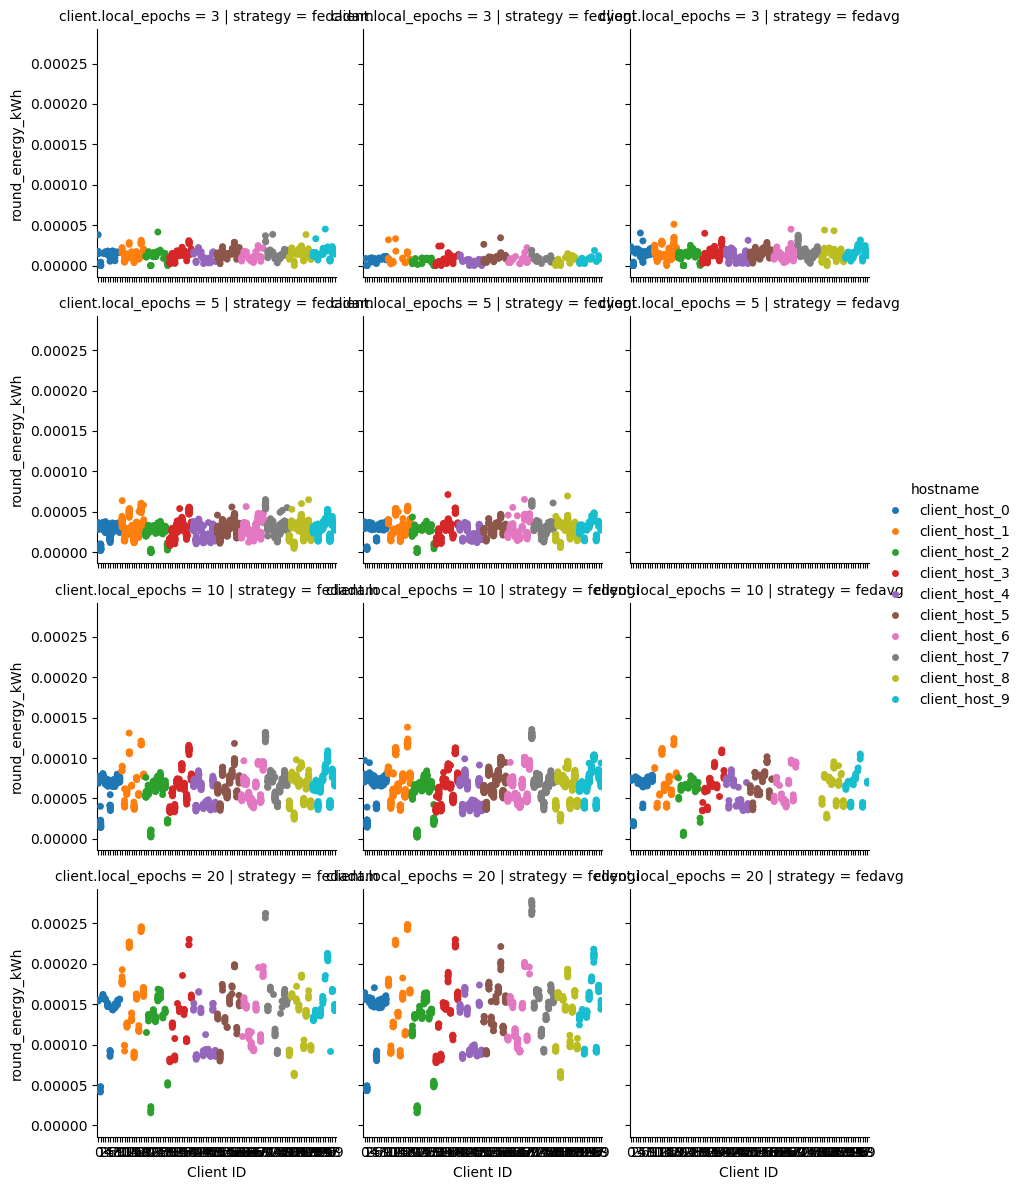

In [27]:
import seaborn as sns
g = sns.catplot(
    data=plot_df,
    x="Client ID", 
    y="round_energy_kWh", 
    row="client.local_epochs", 
    col = "strategy",
    hue="hostname",
    height=3,
    aspect=1,
)
# g.savefig("/Users/mathildepro/Documents/code_projects/FL-G5K-EnergyConsumption/graphs/round_energy_kWh_vs_clientID_100clients.pdf")

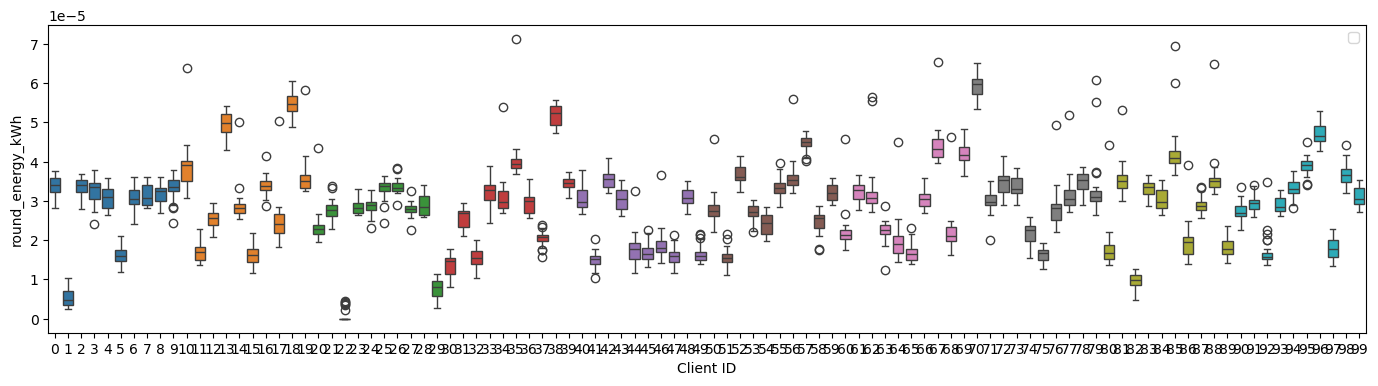

In [31]:

fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(
    ax=ax, x="Client ID", y="round_energy_kWh",data=plot_df[(plot_df["client.local_epochs"]==5)], hue="hostname",
    
    )
# ax.set(ylim=(0, 0.0003))
ax.legend('')
# plt.savefig("/Users/mathildepro/Documents/code_projects/FL-G5K-EnergyConsumption/graphs/round_energy_kWh_vs_clientID_100clients_5local_epochs.pdf")

Just another way of visualizing it.

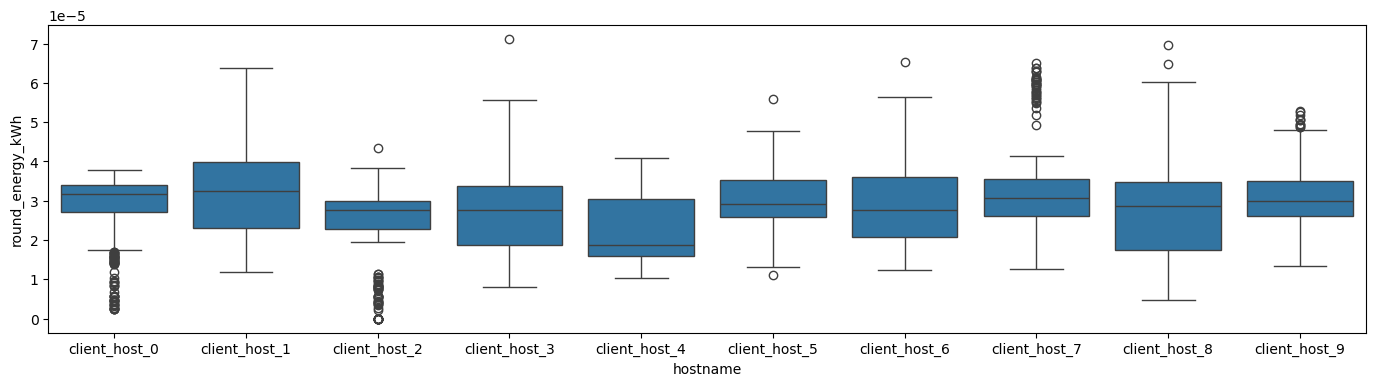

In [32]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(17, 4))
sns.boxplot(ax=ax, x="hostname", y="round_energy_kWh", data=plot_df[(plot_df["client.local_epochs"]==5)])
# plt.savefig("/Users/mathildepro/Documents/code_projects/FL-G5K-EnergyConsumption/graphs/round_energy_kWh_vs_clientID_100clients_5local_epochs.pdf")

if you are looking at several-client-per-host experiments, this graphs shows the average per host

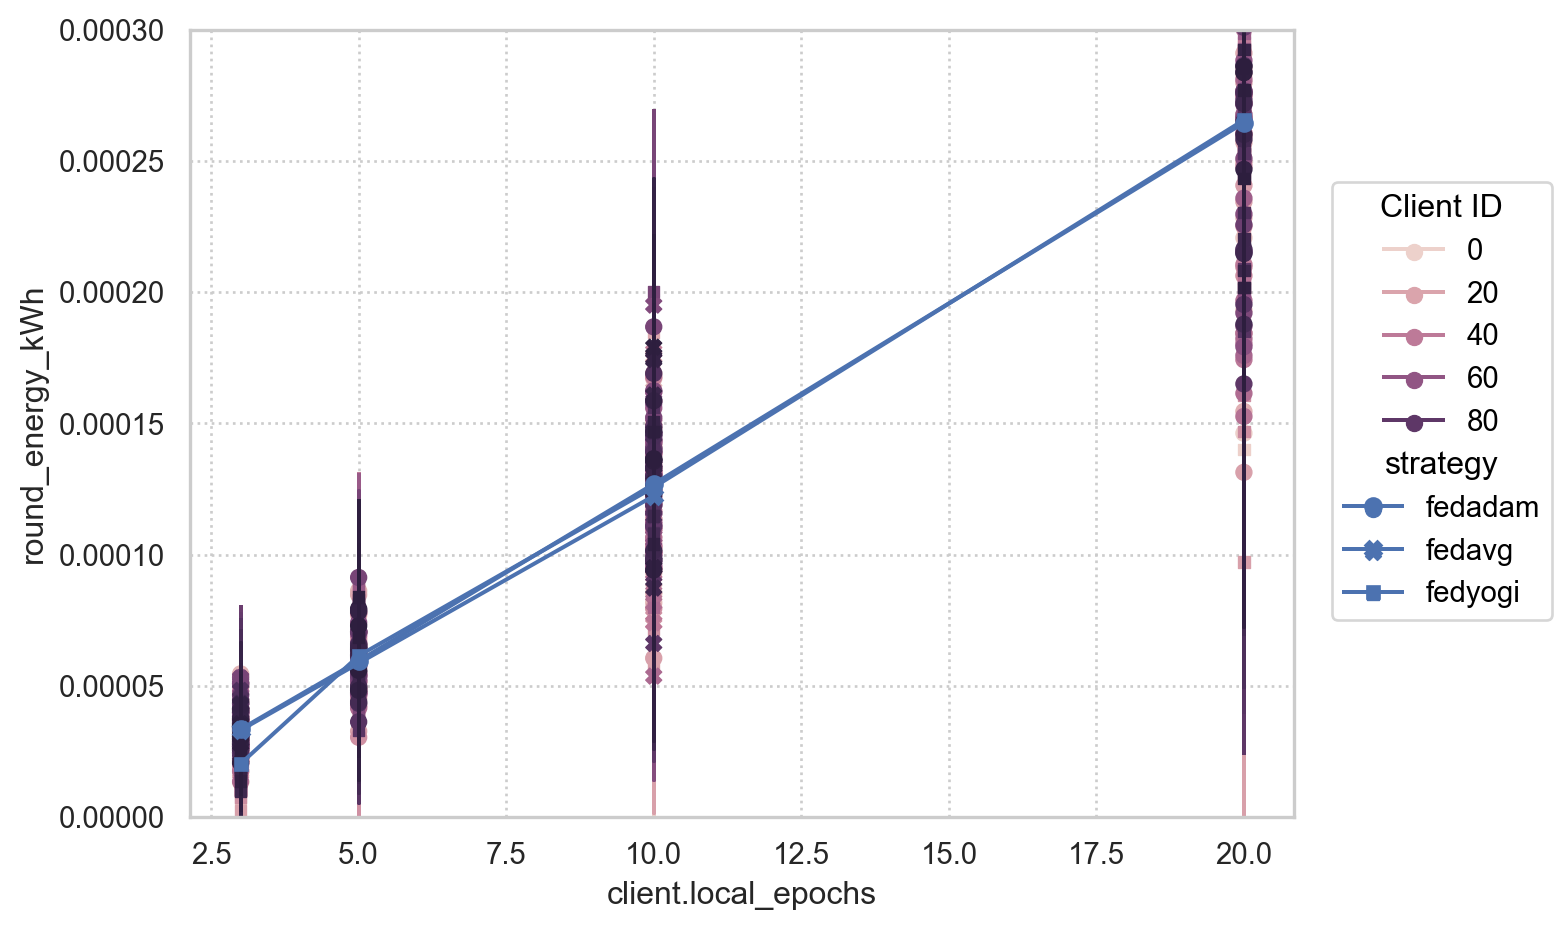

In [33]:
params = ["hostname", "server_round", "Client ID", "strategy", "params.wait_round", "params.num_rounds","exp_id", "client.local_epochs"]
plot_df = round_pq[(round_pq["params.fraction_fit"]==ffit)].groupby(params)[["round_energy_kWh"]].mean().reset_index().compute()

sf1 = plt.Figure(figsize=(7, 5))
(
    so.Plot(
        plot_df, x="client.local_epochs", y="round_energy_kWh",
         color="Client ID",marker="strategy"
    )
    # .add(so.Dot(), so.Agg(), so.Dodge())
    .add(so.Dot(),so.Agg()) #, so.Dodge()) 
    .add(so.Range(), so.Est(errorbar="sd")) #, so.Dodge())
    .add(so.Line(), so.Agg(), color=None)
    # .scale(color="tab10", pointsize=(1, 2), edgecolor=None)
    # .add(so.Dot(marker="+", pointsize=100, edgewidth=100), so.Agg(), color=None)
    .limit(y=(0, 0.0003))
    .layout(engine="tight")
    # .label(x="Number of Clients per host", y="Training Time (s)", color="Host")
    .on(sf1)
)

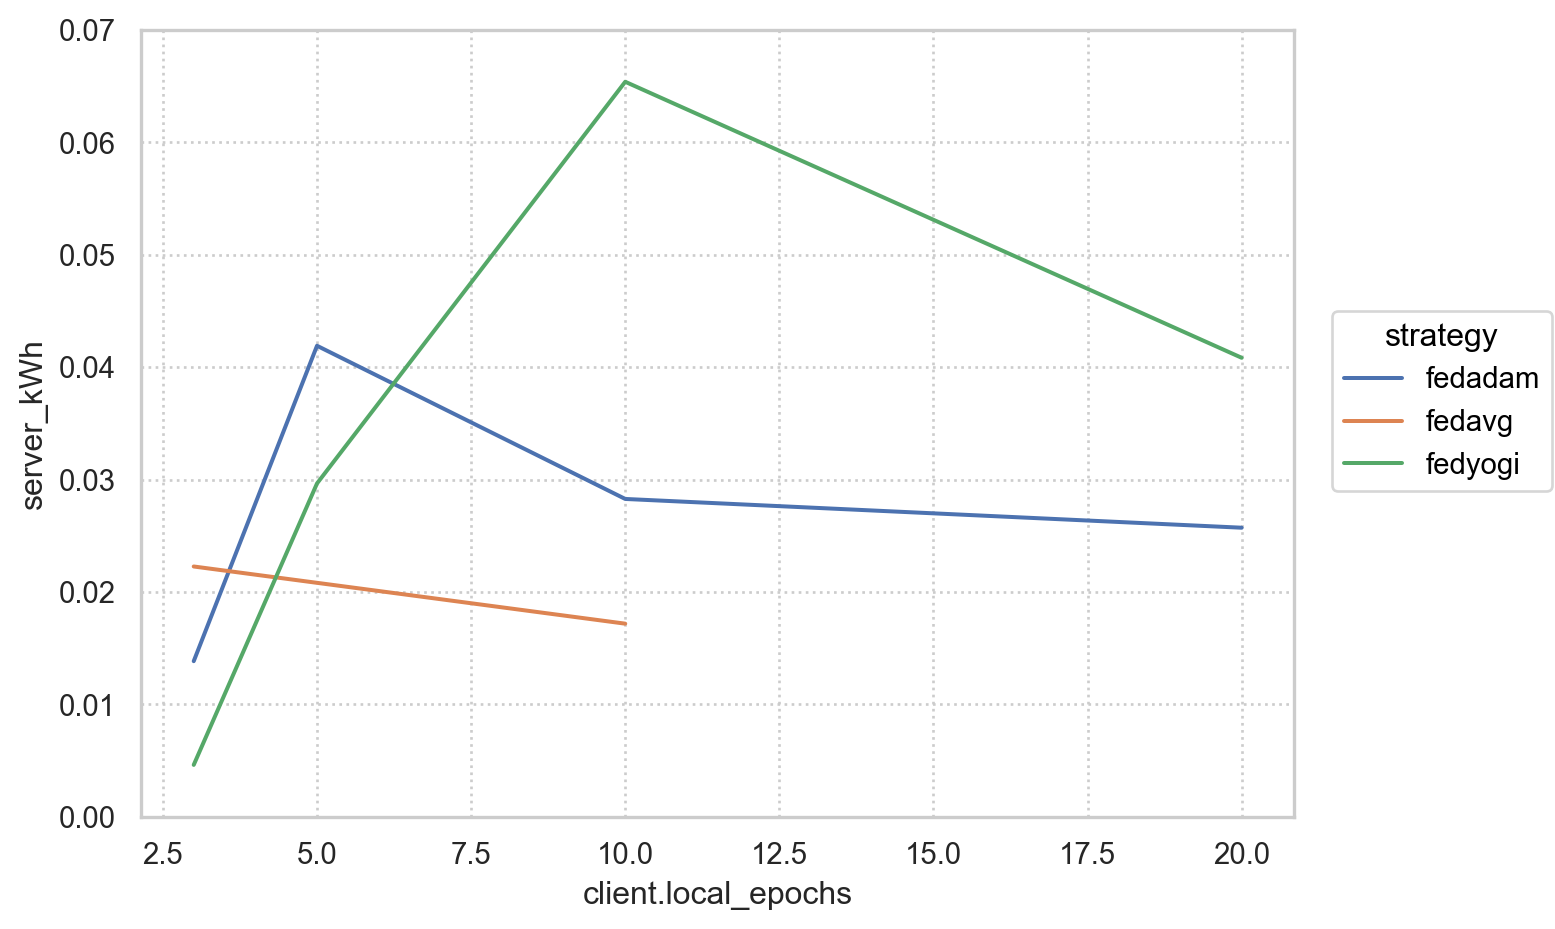

In [34]:
params = ["hostname", "server_round", "Client ID", "strategy", "params.wait_round", "params.num_rounds","exp_id", "client.local_epochs"]
plot_df = round_pq[(round_pq["params.fraction_fit"]==ffit)].groupby(params)[["server_kWh"]].mean().reset_index().compute()

sf1 = plt.Figure(figsize=(7, 5))
(
    so.Plot(
        plot_df, x="client.local_epochs", y="server_kWh",
        color="strategy"
    )
    # .add(so.Range(), so.Est(errorbar="sd"))
    .add(so.Line(), so.Agg())
    # .add(so.Dot(), so.Dodge())
    .limit(y=(0, 0.07))
    .layout(engine="tight")
    .on(sf1)
    # .save("/Users/mathildepro/Documents/code_projects/FL-G5K-EnergyConsumption/graphs/server_kWh_vs_local_epochs_10clients.pdf", bbox_inches="tight")
)

In [36]:
c_df = round_pq[(round_pq["params.fraction_fit"]==ffit)&(round_pq["('fittime', 'count')"]==1)]
c_df["round_server_kWh"] = c_df["server_kWh"] / c_df["round_number"]
c_df = c_df[c_df["round_number"]>10].groupby(["data.num_clients","Client ID", "client.local_epochs", "strategy"])[["round_energy_kWh", "server_kWh", "round_server_kWh"]].mean().reset_index()
c_df.compute() #.to_csv("stats_100clients.csv") #.to_clipboard()

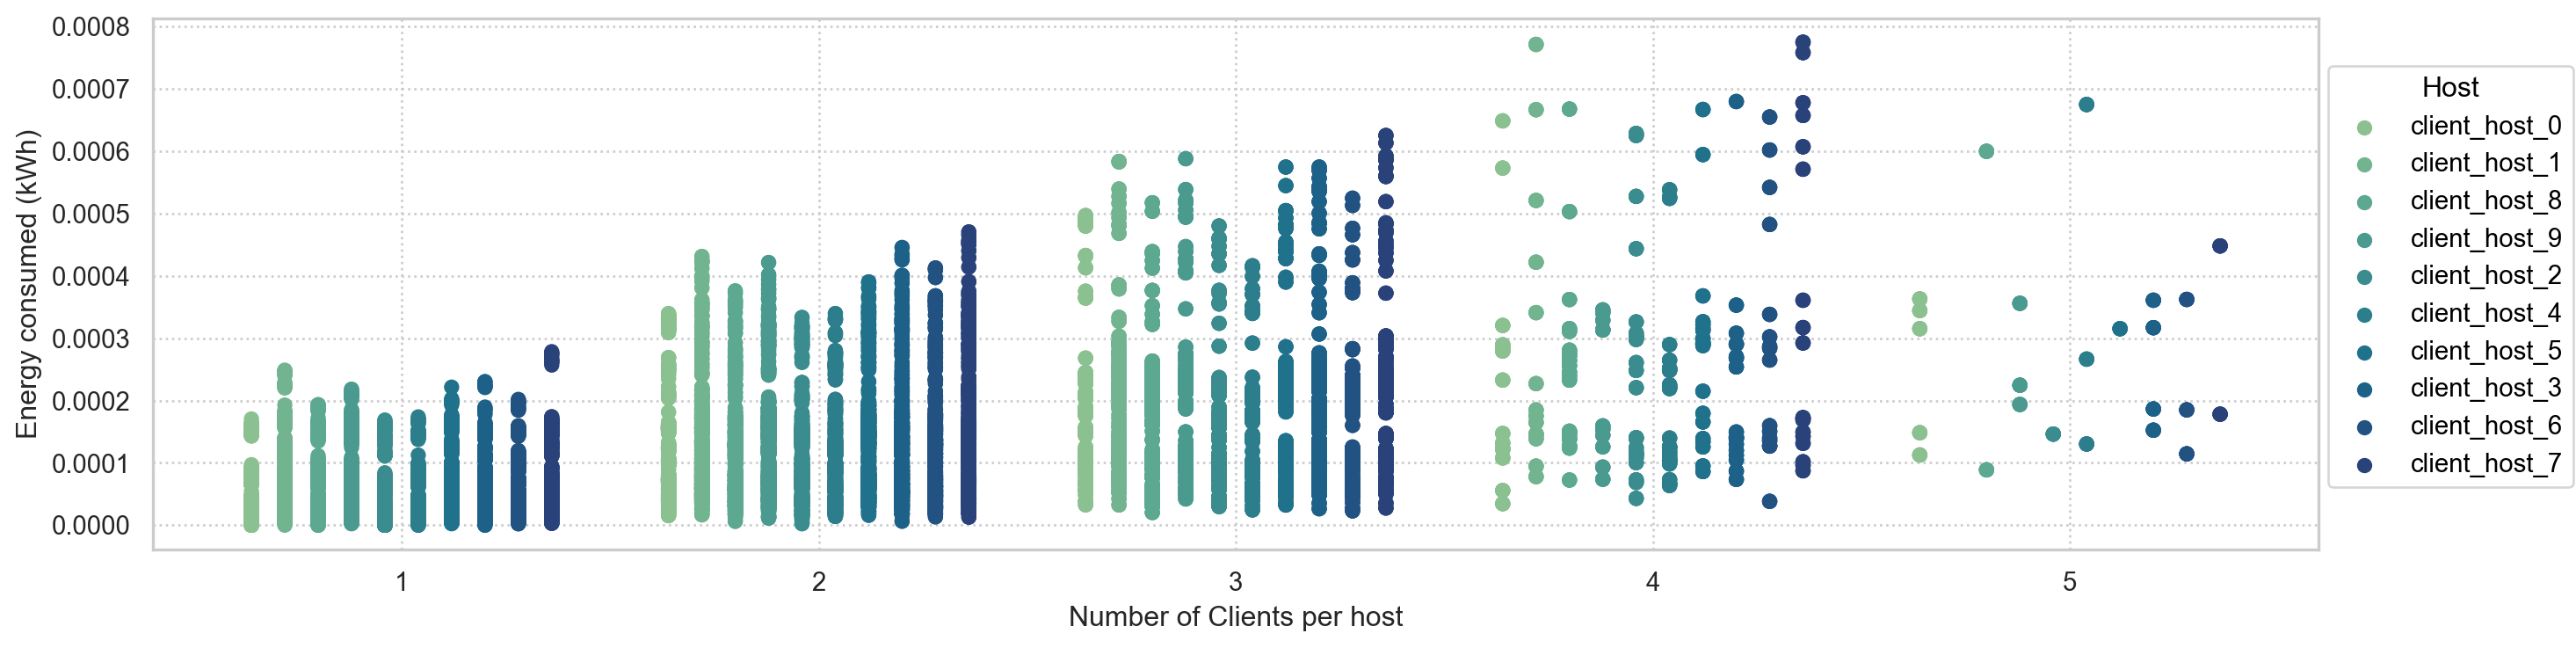

In [37]:
sf1 = plt.Figure(figsize=(14, 4))
(
    so.Plot(
        # fittime_stats[fittime_stats["server_round"]<12], x="server_round", y="fittime",
        # pointsize=('fittime', 'count'), color="Client ID",
        round_pq.compute(), x="('fittime', 'count')", y="round_energy_kWh",
        color="hostname",
    )
    # .facet(col=('fittime', 'count'))
    .add(so.Dot(), so.Dodge())
    .layout(engine="tight")
    .scale(color="crest", pointsize=(5, 11))
    .label(x="Number of Clients per host", y="Energy consumed (kWh)", color="Host")
    .on(sf1)
)

[Comments from march experiments]

Here we can see that in average the training time increases with the number of client per host. However there are always outliers with a training time twice as long. It doesn't seem to be related to the client or the host anyway. The variance doesn't seem to be increasing with the number of client per host.

It seems that the training time increases with the server round.

ok one thing that's sure is that the training time is different for two client training at the same time on the same host. so what do we do? I guess we are going to need to look at the processes. In the midtime, we can gather the energy between the minimum start time and maximum end time.

un peu plus de variabilité avec l'énergie : les hosts ne consomment pas pareil (c'est attendu).
mais on voit bien que plus il y a de client par host plus la consommation d'énergie est forte, elle est même presque proportionnelle.

TODO : répartir l'énergie par clients et voir si on est équivalent


In [49]:
import pandas as pd
df_10 = pd.read_csv("stats_10clients.csv")
df_100 = pd.read_csv("stats_100clients.csv")
df = pd.concat([df_10, df_100], ignore_index=True)
df.dtypes

Unnamed: 0               int64
data.num_clients         int64
Client ID                int64
client.local_epochs      int64
strategy                object
server_kWh             float64
round_energy_kWh       float64
round_server_kWh       float64
dtype: object

In [76]:
df.drop(columns=["Unnamed: 0"]) #.style.background_gradient(subset=["Client ID"], cmap='viridis', low=0.2, high=0.2, axis=0)

data.num_clients  Client ID  client.local_epochs    strategy  \
0                   10          0                    1  fedadagrad   
1                   10          0                    1     fedadam   
2                   10          0                    1      fedavg   
3                   10          0                    1     fedyogi   
4                   10          0                    3  fedadagrad   
...                ...        ...                  ...         ...   
1092               100         99                   10     fedadam   
1093               100         99                   10      fedavg   
1094               100         99                   10     fedyogi   
1095               100         99                   20     fedadam   
1096               100         99                   20     fedyogi   

      server_kWh  round_energy_kWh  round_server_kWh  energy_per_epoch  
0       0.045465          0.000038          0.000076          0.000038  
1       0.018275          0.000038          0.000073          0.000038  
2       0.018037          0.000037          0.000060          0.000037  
3       0.021899          0.000038          0.000073          0.000038  
4       0.018666          0.000127          0.000101          0.000042  
...          ...               ...               ...               ...  
1092    0.029575          0.000069          0.000151          0.000007  
1093    0.017181          0.000070          0.000161          0.000007  
1094    0.067511          0.000070          0.000150          0.000007  
1095    0.025717          0.000146          0.000206          0.000007  
1096    0.040833          0.000150          0.000205          0.000007  

[1097 rows x 8 columns]

In [57]:
df["energy_per_epoch"]=df["round_energy_kWh"]/df["client.local_epochs"]

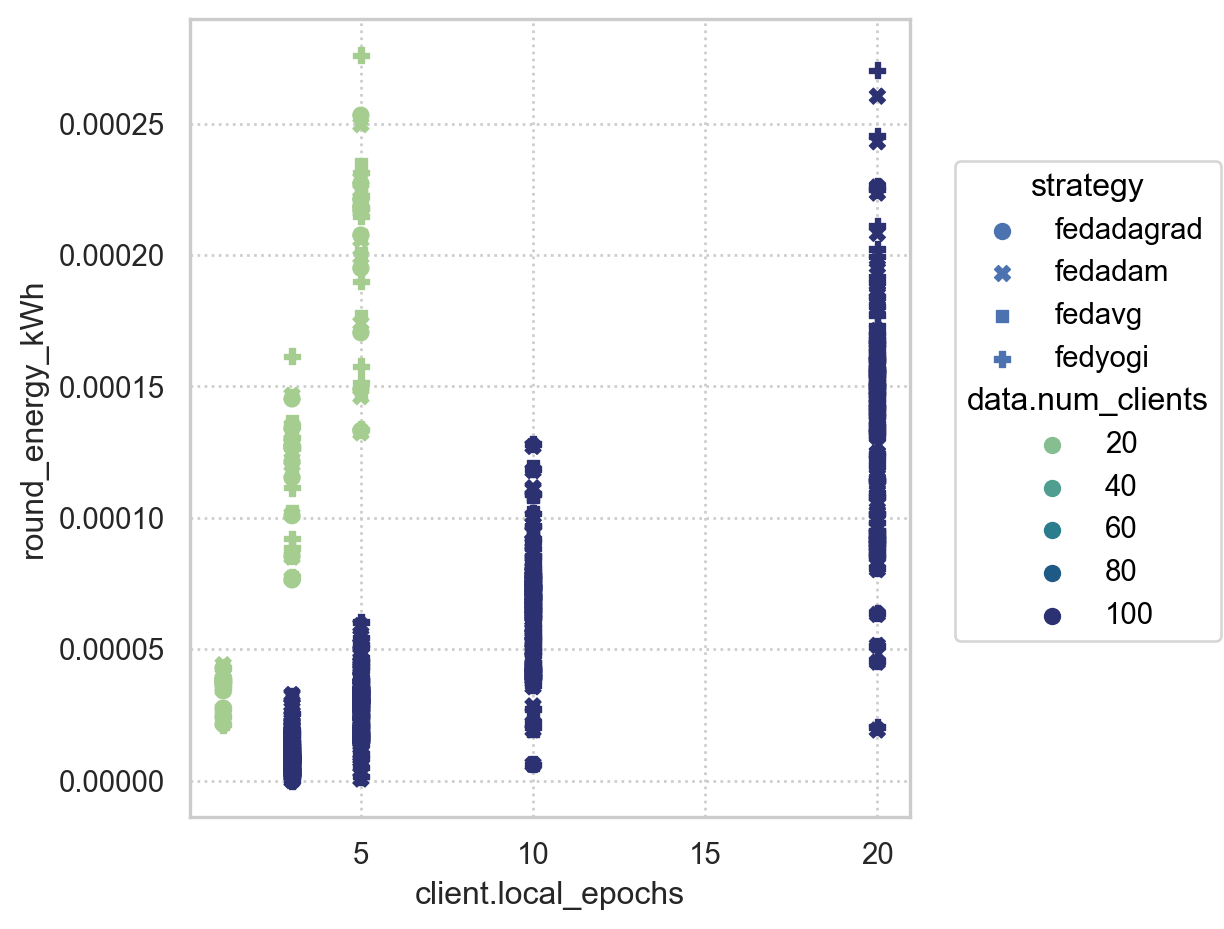

In [52]:
sf1 = plt.Figure(figsize=(5, 5))
(
    so.Plot(
        df, #df["client.local_epochs"].isin([3,5])], 
        y="round_energy_kWh",
        x="client.local_epochs", 
        marker = "strategy",
        # marker="strategy", 
        color="data.num_clients"
    )
    # .facet(
    #     row="strategy",
    #     col="data.num_clients"
    #     )
    .add(so.Dot())
    # .add(so.Range(), so.Agg(), so.Dodge(), )
    # .add(so.Range(), so.Est(errorbar="sd"), so.Dodge()) 
    .layout(engine="tight")
    .scale(color="crest", pointsize=(5, 8))
    # .label(x="Number of Clients per host", y="Energy consumed (kWh)", color="Host")
    .on(sf1)
    # .save("/Users/mathildepro/Documents/code_projects/FL-G5K-EnergyConsumption/graphs/round_energy_kWh_vs_local_epochs.pdf", bbox_inches="tight")
)

In [73]:
df.groupby(["data.num_clients", "client.local_epochs", "strategy"])[["round_energy_kWh"]].mean() #.reset_index().to_clipboard()

round_energy_kWh
data.num_clients client.local_epochs strategy                    
10               1                   fedadagrad          0.000034
                                     fedadam             0.000034
                                     fedavg              0.000034
                                     fedyogi             0.000034
                 3                   fedadagrad          0.000116
                                     fedadam             0.000117
                                     fedavg              0.000118
                                     fedyogi             0.000118
                 5                   fedadagrad          0.000199
                                     fedadam             0.000200
                                     fedavg              0.000202
                                     fedyogi             0.000201
100              3                   fedadam             0.000014
                                     fedavg              0.000015
                                     fedyogi             0.000008
                 5                   fedadam             0.000028
                                     fedyogi             0.000029
                 10                  fedadam             0.000065
                                     fedavg              0.000064
                                     fedyogi             0.000065
                 20                  fedadam             0.000138
                                     fedyogi             0.000138

In [61]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg_df = df.groupby(["data.num_clients"])[["energy_per_epoch"]].mean().reset_index()
X = reg_df["data.num_clients"].values.reshape(-1, 1)
y = reg_df["energy_per_epoch"].values
reg = LinearRegression().fit(X, y)
reg.score(X, y)


1.0

In [62]:
reg.coef_, reg.intercept_

(array([-3.56463725e-07]), 4.1348478874948834e-05)

In [70]:
num_clients = 1000
num_local_epochs = 3

x_pred = np.array(num_clients).reshape(-1, 1)
reg.predict(x_pred)*num_local_epochs

array([-0.00094535])

bon ça a pas l'air de marcher, il faudrait plus de points.

In [75]:
energy_per_epoch = 0.000038
num_clients = 10
num_local_epochs = 20
energy_per_epoch*num_local_epochs*num_clients

0.007600000000000001